In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = 'Deppr.csv'

df = pd.read_csv(data, header=None)

In [3]:
df.shape

(186, 9)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,Good,8,Yes,Good,No,No,No,Yes,70
1,Normal,10,Yes,Good,No,No,No,Yes,60
2,Good,8,Yes,Good,Yes,No,No,Yes,70
3,Normal,6,Yes,Good,Yes,No,Yes,No,50
4,Good,10,Yes,Good,Yes,No,No,Yes,90


In [5]:
col_names = ['feeling', 'sleep', 'finance','understanding','living','inferiority','sick','recreation','scale']
df.columns = col_names
col_names

['feeling',
 'sleep',
 'finance',
 'understanding',
 'living',
 'inferiority',
 'sick',
 'recreation',
 'scale']

In [6]:
df.head()

,feeling,sleep,finance,understanding,living,inferiority,sick,recreation,scale
0,Good,8,Yes,Good,No,No,No,Yes,70
1,Normal,10,Yes,Good,No,No,No,Yes,60
2,Good,8,Yes,Good,Yes,No,No,Yes,70
3,Normal,6,Yes,Good,Yes,No,Yes,No,50
4,Good,10,Yes,Good,Yes,No,No,Yes,90


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   feeling        186 non-null    object
 1   sleep          186 non-null    int64 
 2   finance        186 non-null    object
 3   understanding  186 non-null    object
 4   living         186 non-null    object
 5   inferiority    186 non-null    object
 6   sick           186 non-null    object
 7   recreation     186 non-null    object
 8   scale          186 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 13.2+ KB


In [8]:
col_names = ['feeling', 'sleep', 'finance','understanding','living','inferiority','sick','recreation','scale']
for col in col_names:
    print(df[col].value_counts())

Bad          38
Very bad     38
Good         37
Very good    37
Normal       36
Name: feeling, dtype: int64
6     47
8     30
3     20
2     19
7     18
5     17
4     16
1     14
10     5
Name: sleep, dtype: int64
Yes    108
No      78
Name: finance, dtype: int64
Good      76
Bad       67
Normal    43
Name: understanding, dtype: int64
Yes    97
No     89
Name: living, dtype: int64
No     102
Yes     84
Name: inferiority, dtype: int64
No     123
Yes     63
Name: sick, dtype: int64
No     107
Yes     79
Name: recreation, dtype: int64
30     18
10     15
70     14
55     13
5      12
45     12
15     11
25     11
75     11
85     11
90     10
50     10
35      9
65      9
95      9
100     8
80      2
60      1
Name: scale, dtype: int64


In [9]:
df['scale'].value_counts()

30     18
10     15
70     14
55     13
5      12
45     12
15     11
25     11
75     11
85     11
90     10
50     10
35      9
65      9
95      9
100     8
80      2
60      1
Name: scale, dtype: int64

In [10]:
df.isnull().sum()

feeling          0
sleep            0
finance          0
understanding    0
living           0
inferiority      0
sick             0
recreation       0
scale            0
dtype: int64

In [11]:
df.head()

,feeling,sleep,finance,understanding,living,inferiority,sick,recreation,scale
0,Good,8,Yes,Good,No,No,No,Yes,70
1,Normal,10,Yes,Good,No,No,No,Yes,60
2,Good,8,Yes,Good,Yes,No,No,Yes,70
3,Normal,6,Yes,Good,Yes,No,Yes,No,50
4,Good,10,Yes,Good,Yes,No,No,Yes,90


In [12]:
df.describe()

,sleep,scale
count,186.000000,186.000000
mean,5.155914,50.322581
std,2.325509,29.644802
min,1.000000,5.000000
25%,3.000000,25.000000
50%,6.000000,50.000000
75%,7.000000,75.000000
max,10.000000,100.000000


In [13]:
df['finance'] = df['finance'].map({'Yes': 1, 'No': 0})
df['living'] = df['living'].map({'Yes': 1, 'No': 0})
df['inferiority'] = df['inferiority'].map({'Yes': 1, 'No': 0})
df['sick'] = df['sick'].map({'Yes': 1, 'No': 0})
df['recreation'] = df['recreation'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,feeling,sleep,finance,understanding,living,inferiority,sick,recreation,scale
0,Good,8,1,Good,0,0,0,1,70
1,Normal,10,1,Good,0,0,0,1,60
2,Good,8,1,Good,1,0,0,1,70
3,Normal,6,1,Good,1,0,1,0,50
4,Good,10,1,Good,1,0,0,1,90


In [15]:
status = pd.get_dummies(df['feeling'])
status1 = pd.get_dummies(df['understanding'])

In [16]:
status.head()

,Bad,Good,Normal,Very bad,Very good
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [17]:
status1.head()

,Bad,Good,Normal
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [18]:
status = pd.get_dummies(df['feeling'], drop_first = True)
status1 = pd.get_dummies(df['understanding'], drop_first = True)

In [19]:
status.head()

,Good,Normal,Very bad,Very good
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [20]:
status1.head()

,Good,Normal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
df = pd.concat([df, status], axis = 1)
df = pd.concat([df, status1], axis = 1)

In [22]:
df.head()

,feeling,sleep,finance,understanding,living,inferiority,sick,recreation,scale,Good,Normal,Very bad,Very good,Good,Normal
0,Good,8,1,Good,0,0,0,1,70,1,0,0,0,1,0
1,Normal,10,1,Good,0,0,0,1,60,0,1,0,0,1,0
2,Good,8,1,Good,1,0,0,1,70,1,0,0,0,1,0
3,Normal,6,1,Good,1,0,1,0,50,0,1,0,0,1,0
4,Good,10,1,Good,1,0,0,1,90,1,0,0,0,1,0


In [23]:
df.drop(['feeling'], axis = 1, inplace = True)
df.drop(['understanding'], axis = 1, inplace = True)

In [24]:
df.head()

,sleep,finance,living,inferiority,sick,recreation,scale,Good,Normal,Very bad,Very good,Good,Normal
0,8,1,0,0,0,1,70,1,0,0,0,1,0
1,10,1,0,0,0,1,60,0,1,0,0,1,0
2,8,1,1,0,0,1,70,1,0,0,0,1,0
3,6,1,1,0,1,0,50,0,1,0,0,1,0
4,10,1,1,0,0,1,90,1,0,0,0,1,0


In [25]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                        
df = df.apply(normalize) 

In [26]:
df.head()

,sleep,finance,living,inferiority,sick,recreation,scale,Good,Normal,Very bad,Very good,Good,Normal
0,0.777778,1.0,0.0,0.0,0.0,1.0,0.684211,1.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,1.0,0.0,0.0,0.0,1.0,0.578947,0.0,1.0,0.0,0.0,1.0,0.0
2,0.777778,1.0,1.0,0.0,0.0,1.0,0.684211,1.0,0.0,0.0,0.0,1.0,0.0
3,0.555556,1.0,1.0,0.0,1.0,0.0,0.473684,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000000,1.0,1.0,0.0,0.0,1.0,0.894737,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X = df.drop(['scale'], axis=1)

y = df['scale']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [29]:
X_train.shape, X_test.shape

((148, 12), (38, 12))

In [30]:
X_train.dtypes

sleep          float64
finance        float64
living         float64
inferiority    float64
sick           float64
recreation     float64
Good           float64
Normal         float64
Very bad       float64
Very good      float64
Good           float64
Normal         float64
dtype: object

In [31]:
X_train.head()

,sleep,finance,living,inferiority,sick,recreation,Good,Normal,Very bad,Very good,Good,Normal
123,0.444444,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
135,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
150,0.222222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
12,0.777778,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [32]:
y_train.head()

123    0.421053
135    0.052632
150    0.263158
31     0.842105
12     0.842105
Name: scale, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor= LinearRegression()

In [35]:
regressor.fit(X_train, y_train)  

LinearRegression()

In [36]:
y_pred= regressor.predict(X_test) 

In [37]:
y_pred

array([0.04534561, 0.69444923, 0.45627536, 0.91001103, 0.26398631,
       0.47948744, 0.92046248, 0.2497904 , 0.25876058, 0.04534561,
       0.66040513, 0.25876058, 0.46946131, 0.04534561, 0.28362302,
       0.69844993, 0.47026102, 0.92046248, 0.25310953, 0.92046248,
       0.28362302, 0.25876058, 0.91001103, 0.69444923, 0.2752434 ,
       0.3159945 , 0.70010029, 0.69444923, 0.2752434 , 0.92046248,
       0.92046248, 0.25876058, 0.92046248, 0.4506243 , 0.26959235,
       0.05057134, 0.04534561, 0.46300463])

In [38]:
X_test.head(10)

,sleep,finance,living,inferiority,sick,recreation,Good,Normal,Very bad,Very good,Good,Normal
113,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164,0.555556,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
169,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.555556,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
100,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.777778,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
177,0.777778,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
35,0.333333,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
119,0.222222,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
y_test.head(10)

113    0.052632
164    0.736842
169    0.526316
101    0.842105
100    0.263158
15     0.526316
177    0.842105
35     0.210526
119    0.263158
152    0.000000
Name: scale, dtype: float64

In [40]:
y_pred_train = regressor.predict(X_train)

y_pred_train

array([0.47591207, 0.04534561, 0.26479195, 0.8707412 , 0.91401172,
       0.4532441 , 0.908786  , 0.27001767, 0.47468704, 0.70010029,
       0.05137697, 0.05057134, 0.69444923, 0.47208111, 0.25876058,
       0.91523675, 0.70490069, 0.25310953, 0.26356099, 0.91523675,
       0.91523675, 0.26479195, 0.92046248, 0.46369556, 0.67481252,
       0.454625  , 0.69444923, 0.26398631, 0.47591207, 0.25021573,
       0.69967496, 0.47288082, 0.69444923, 0.70490069, 0.91001103,
       0.25353486, 0.0606899 , 0.47991277, 0.28110953, 0.71535214,
       0.06182843, 0.69967496, 0.2478838 , 0.04534561, 0.92046248,
       0.67085659, 0.05057134, 0.2478838 , 0.68526398, 0.05057134,
       0.04534561, 0.45585003, 0.68799847, 0.28362302, 0.06102279,
       0.91001103, 0.454625  , 0.25876058, 0.47591207, 0.92046248,
       0.04763252, 0.05808397, 0.68799847, 0.46946131, 0.47165579,
       0.908786  , 0.05014601, 0.46150109, 0.04492028, 0.68539255,
       0.05057134, 0.67481252, 0.25833526, 0.92046248, 0.45062

In [41]:
y_train

123    0.421053
135    0.052632
150    0.263158
31     0.842105
12     0.842105
         ...   
106    0.105263
14     0.000000
92     0.052632
179    0.000000
102    0.631579
Name: scale, Length: 148, dtype: float64

In [42]:
print('Training set score: {:.4f}'.format(regressor.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(regressor.score(X_test, y_test)))

Training set score: 0.9771
Test set score: 0.9706


In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [44]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.002717637217020896
r_square_value : 0.9705769544106189


<AxesSubplot:>

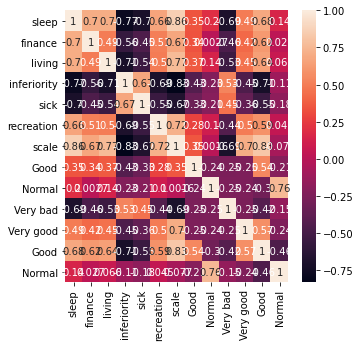

In [45]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True)

In [46]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [47]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  scale   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     480.4
Date:                Mon, 20 Sep 2021   Prob (F-statistic):          2.38e-104
Time:                        11:52:49   Log-Likelihood:                 241.42
No. Observations:                 148   AIC:                            -456.8
Df Residuals:                     135   BIC:                            -417.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2569      0.026     10.059      

Text(0, 0.5, 'Feeling Scale')

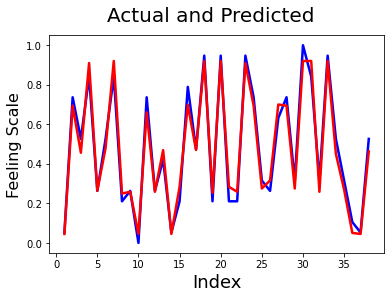

In [48]:
# Actual vs Predicted
c = [i for i in range(1,39,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")    
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")  
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Feeling Scale', fontsize=16)                       

Text(0, 0.5, 'y_pred')

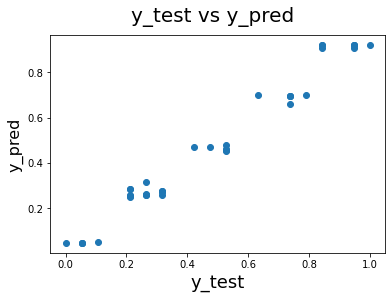

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)  

Text(0, 0.5, 'ytest-ypred')

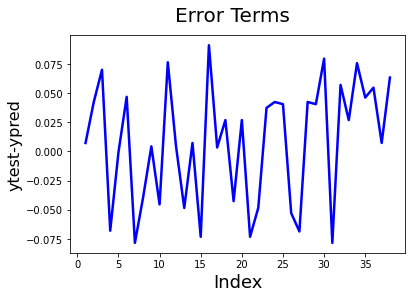

In [50]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,39,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                    
plt.ylabel('ytest-ypred', fontsize=16)   

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Index')

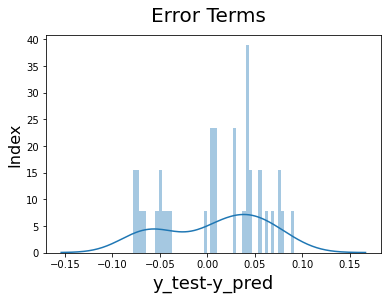

In [51]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                 
plt.xlabel('y_test-y_pred', fontsize=18)               
plt.ylabel('Index', fontsize=16)  